### 통계와 회귀

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

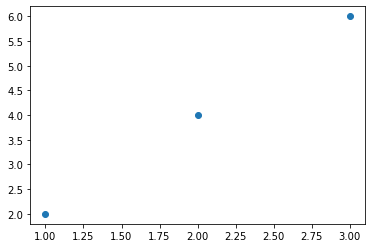

In [4]:
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)

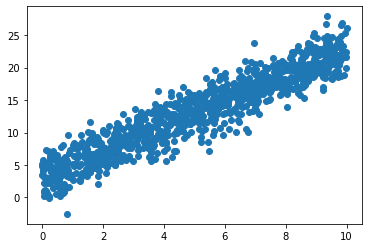

In [8]:
# 기울기가 2, y 절편이 3인 회귀 곡선 그려보기
# x의 범위는 0 ~ 10
# randim.gauss(평균, 표준 편차)
from random import gauss

x1 = []
y1 = []
for i in range(1000):
    imsi = random.random() * 10
    x1.append(imsi)
    y1.append(2*imsi + random.gauss(3,2))
    #y1.append(2*imsi + 3 + random.gauss(0,2))
plt.scatter(x1, y1)

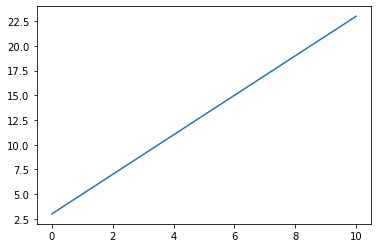

In [7]:
x2 = range(11)
y2 = [2 * n + 3 for n in range(11)]
plt.plot(x2, y2)

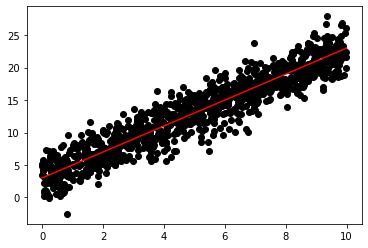

In [9]:
plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "red")
plt.show()

In [10]:
X = sm.add_constant(x1)
model = sm.OLS(y1, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     7717.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:01:06   Log-Likelihood:                -2142.0
No. Observations:                1000   AIC:                             4288.
Df Residuals:                     998   BIC:                             4298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1587      0.130     24.254      0.0

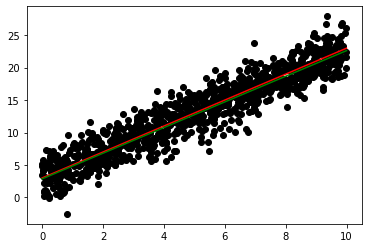

In [11]:
x3 = range(11)
y3 = [1.9766 * n + 2.8605 for n in x3]

plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "red")
plt.plot(x3, y3, c = "green")
plt.show()

In [17]:
score1 = 0
score2 = 0
for a, i in enumerate(x1):
    score1 += (y1[a] - (2 * i + 3))**2
    score2 += (y1[a] - (1.9766 * i + 2.8605))**2
print(score1/len(x1))
print(score2/len(x1))

4.254014336069539
4.319055850228592


### 다중공선성

In [18]:
x4 = []
x4_1 = []
y4 = []
for i in range(1000):
    imsi = random.random() * 10
    x4.append(imsi)
    x4_1.append(imsi + random.gauss(0,1))
    y4.append(2*imsi + random.gauss(3,2))
    
df = {"x4" : x4, "x4_1" : x4_1, "y4" : y4}
df = pd.DataFrame(df)



x4 = sm.add_constant(x4, has_constant = "add")
model = sm.OLS(y4, x4)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     8127.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:21:19   Log-Likelihood:                -2133.3
No. Observations:                1000   AIC:                             4271.
Df Residuals:                     998   BIC:                             4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0664      0.127     24.181      0.0

In [20]:
df.corr()

,x4,x4_1,y4
x4,1.000000,0.945284,0.943729
x4_1,0.945284,1.000000,0.898519
y4,0.943729,0.898519,1.000000


In [19]:
df.corrwith(df["x4"])

x4      1.000000
x4_1    0.945284
y4      0.943729
dtype: float64

In [21]:
# VIF
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))

const 3.84562673069305
x1 1.0
